# Gender Recognition by Voice EDA

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Importing file from the original github that was later uploaded to kaggle
fname = 'https://raw.githubusercontent.com/primaryobjects/voice-gender/master/voice.csv'

data=pd.read_csv(fname)
data.columns=data.columns.str.replace(".","_")

# Univariate Analysis

### Sample size and column(variable) names

In [3]:
# Data Size
data_shape=data.shape

print('Number of observations = ', data_shape[0])
print('Number of columns = ', data_shape[1])

# Data Columns
data_columns = data.columns.tolist()
print('Columns: ', data_columns)

Number of observations =  3168
Number of columns =  21
Columns:  ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp_ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


### Describing the data and its relationship within their own variables

In [4]:
# Data Characteristics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp_ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [5]:
# Data Characteristics
data.skew().T

meanfreq   -0.617495
sd          0.136916
median     -1.012785
Q25        -0.490877
Q75        -0.900311
IQR         0.295432
skew        4.933314
kurt        5.872586
sp_ent     -0.430934
sfm         0.339958
mode       -0.837236
centroid   -0.617495
meanfun     0.039141
minfun      1.878004
maxfun     -2.238535
meandom     0.611022
mindom      1.661114
maxdom      0.726189
dfrange     0.728261
modindx     2.064335
dtype: float64

In [6]:
# Data Characteristics
data.kurt().T

meanfreq     0.805161
sd          -0.521789
median       1.629501
Q25          0.018334
Q75          2.981810
IQR         -0.448160
skew        25.363446
kurt        35.932129
sp_ent      -0.423925
sfm         -0.835934
mode        -0.255908
centroid     0.805161
meanfun     -0.859960
minfun      10.758086
maxfun       5.203918
meandom     -0.054773
mindom       2.187586
maxdom       1.314738
dfrange      1.318013
modindx      5.924935
dtype: float64

In [7]:
# Check for duplicated values
data.loc[data.duplicated()]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp_ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


In [8]:
# Dropping the duplicated indexes, so our sample isn't 'dirty'
data=data.drop(index=[298,2403])

In [9]:
# Data (Storage) Type so we know what kind of values we'll work with
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3166 non-null float64
sd          3166 non-null float64
median      3166 non-null float64
Q25         3166 non-null float64
Q75         3166 non-null float64
IQR         3166 non-null float64
skew        3166 non-null float64
kurt        3166 non-null float64
sp_ent      3166 non-null float64
sfm         3166 non-null float64
mode        3166 non-null float64
centroid    3166 non-null float64
meanfun     3166 non-null float64
minfun      3166 non-null float64
maxfun      3166 non-null float64
meandom     3166 non-null float64
mindom      3166 non-null float64
maxdom      3166 non-null float64
dfrange     3166 non-null float64
modindx     3166 non-null float64
label       3166 non-null object
dtypes: float64(20), object(1)
memory usage: 531.8+ KB


In [10]:
#Searching for not available values
print(data.isna().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp_ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


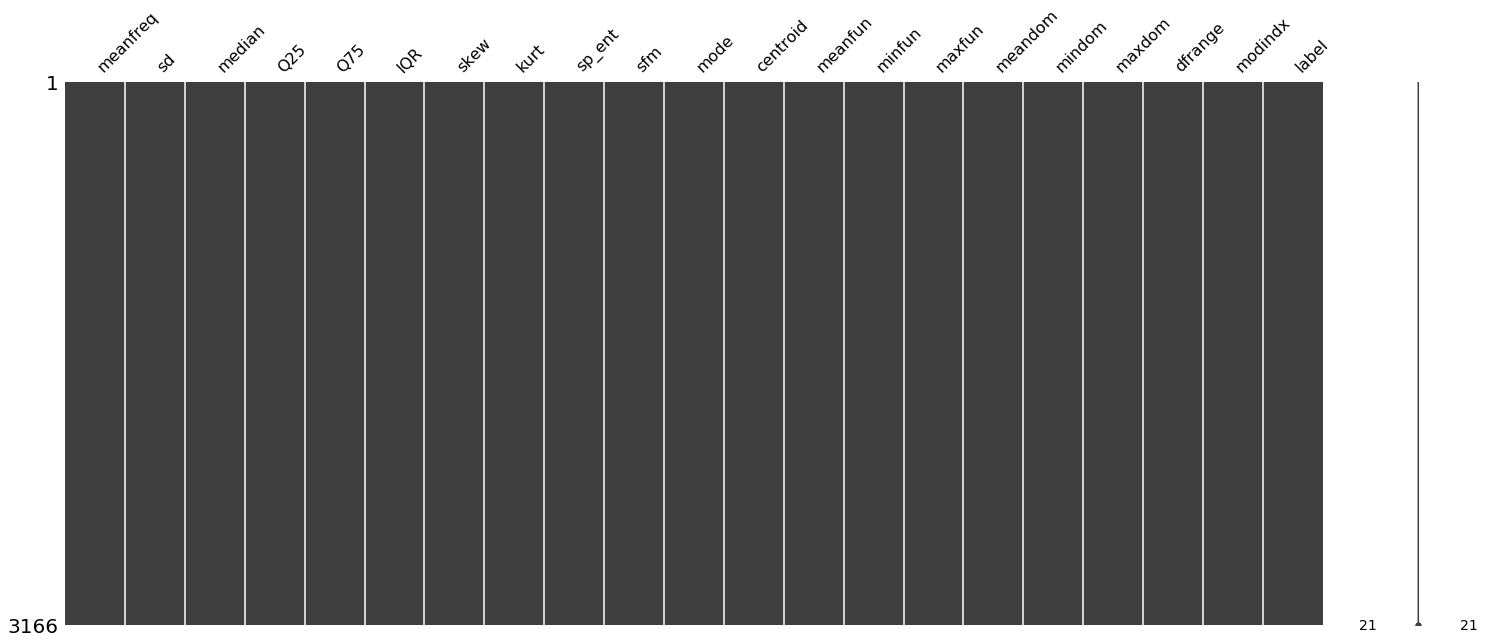

In [11]:
# just to visualize no missing value.
msno.matrix(data)  

In [12]:
# Variable Balance
data.label.value_counts()

female    1583
male      1583
Name: label, dtype: int64

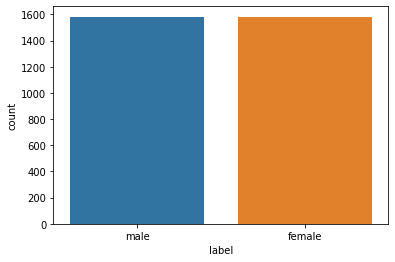

In [13]:
sns.countplot(data=data,x='label')
plt.savefig('numbysex.png')

In [14]:
#We define a nice plotting function to display user friendly plots
def plotting(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data,x=feature,ax=axes[0])
    sns.distplot(a=data[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(8,3)

21


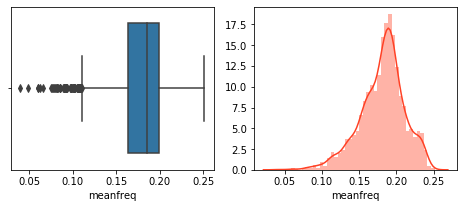

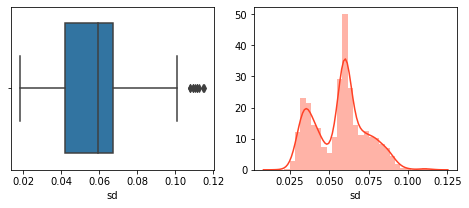

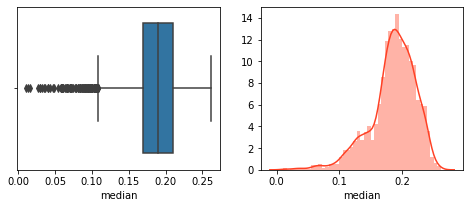

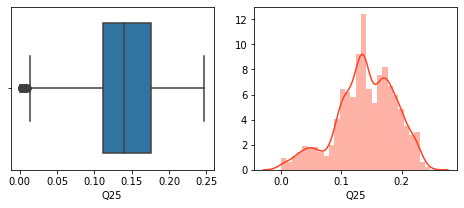

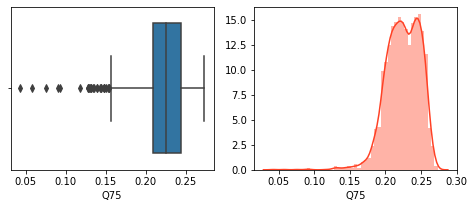

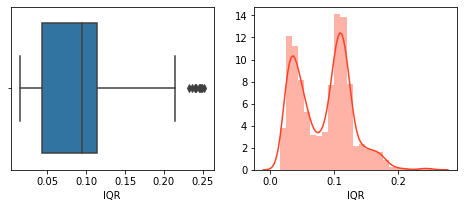

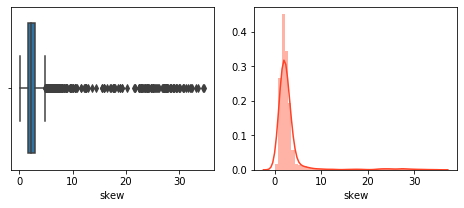

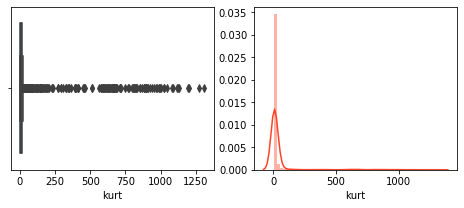

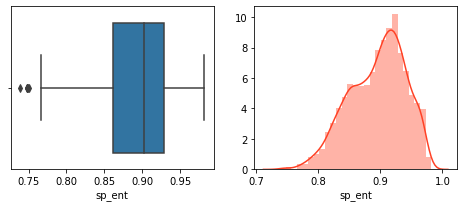

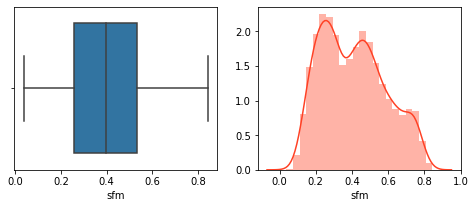

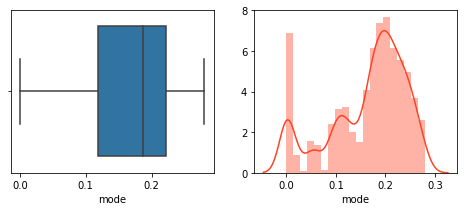

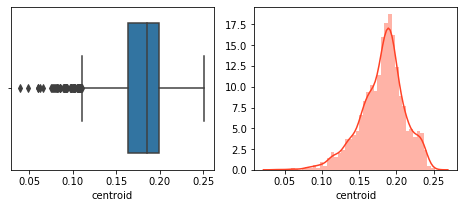

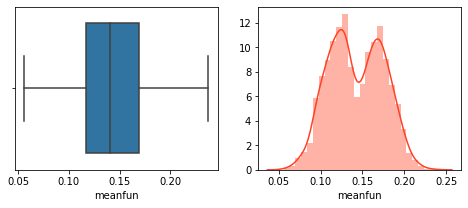

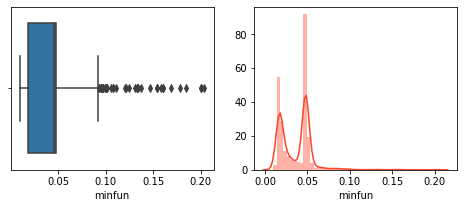

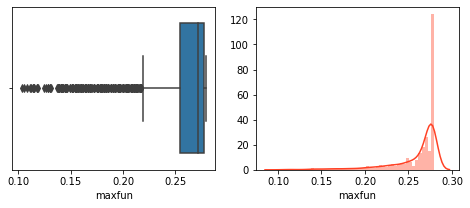

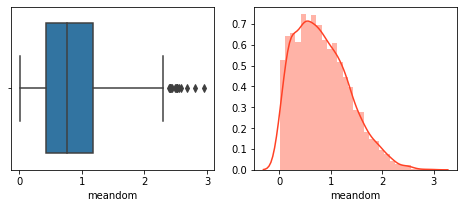

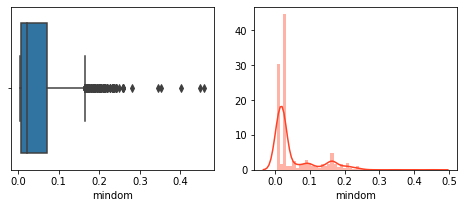

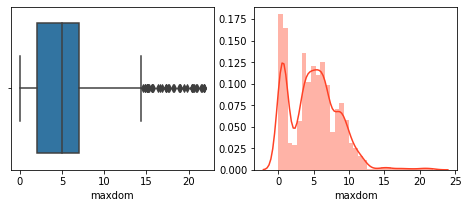

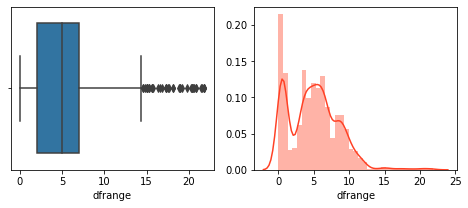

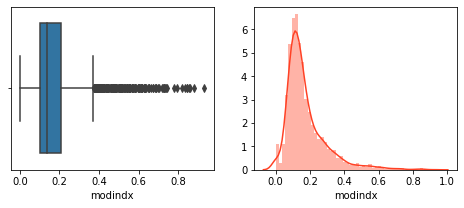

In [15]:
#plotting for each variable (columns until 20 so it doesnt get label)
print(len(data_columns))
plt.rcParams.update({'figure.max_open_warning': 0})
for i in data_columns[:20]:
    plotting(i)

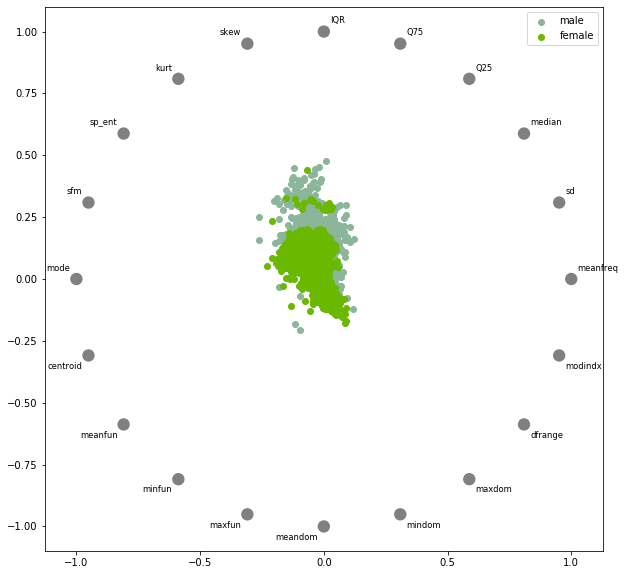

In [16]:
# Comparing all features
plt.rcParams['figure.figsize']=(10,10)
pd.plotting.radviz(data, "label")
plt.show()

# Multivariate Analysis

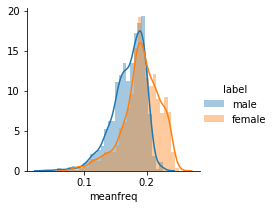

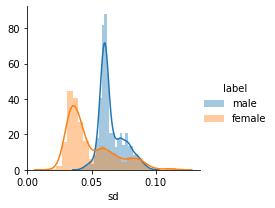

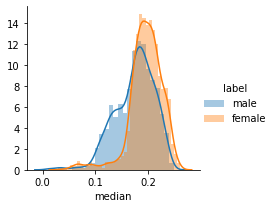

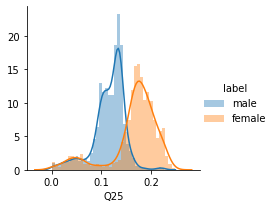

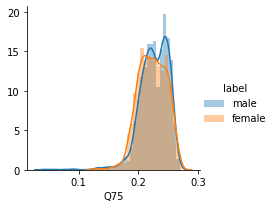

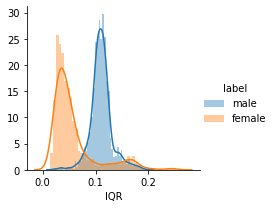

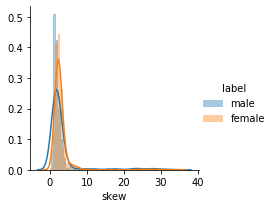

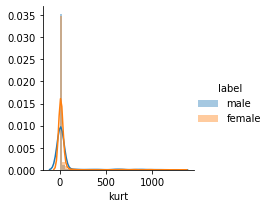

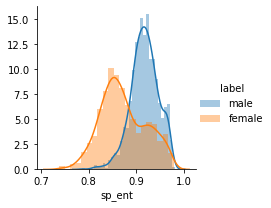

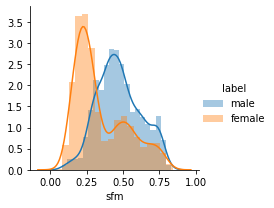

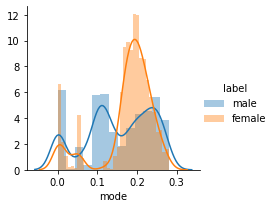

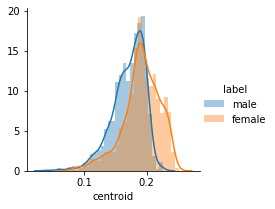

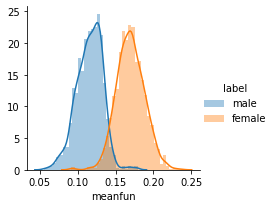

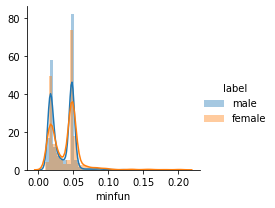

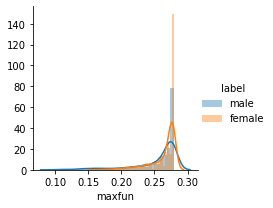

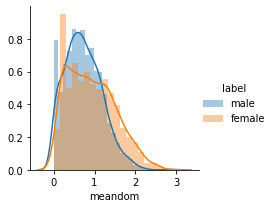

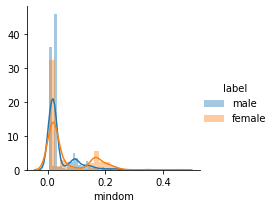

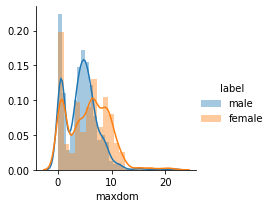

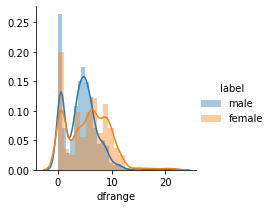

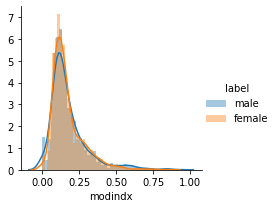

In [17]:
# Seaborn Distribution by label
for column in data.columns[:20]:
    g = sns.FacetGrid(data, hue = 'label')
    g = g.map(sns.distplot,column)
    g = g.add_legend()
    plt.show()

In [18]:
# Checking to see values so the graphs don't look all messy
data.groupby('label').mean()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp_ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,0.190986,0.049146,0.195930,0.165334,0.223169,0.057835,2.985584,24.817034,0.873063,0.344782,0.178535,0.190986,0.169761,0.039424,0.263839,0.928915,0.065013,5.729870,5.664857,0.170104
male,0.170786,0.065115,0.175256,0.115546,0.226326,0.110781,3.296207,48.357244,0.917225,0.471914,0.151961,0.170786,0.115860,0.034179,0.253836,0.728821,0.040249,4.358569,4.318321,0.177398


In [19]:
# making new data frames to plot with less than a unit and more than a unit
datacut=data.drop(columns=['kurt','skew','dfrange','maxdom'])
datacut2=data[['kurt','skew','dfrange','maxdom','label']]

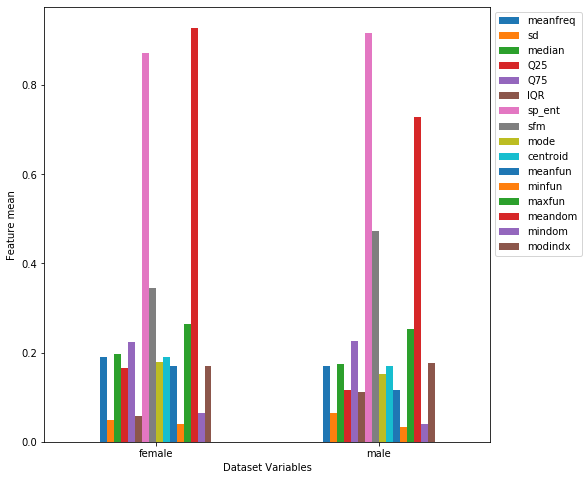

In [20]:
# Plotting the mean of those with less than a unit
plt.rcParams['figure.figsize']=(8,8)
datacut.groupby('label').mean().plot(kind='bar')
plt.ylabel('Feature mean')
plt.xlabel('Dataset Variables')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

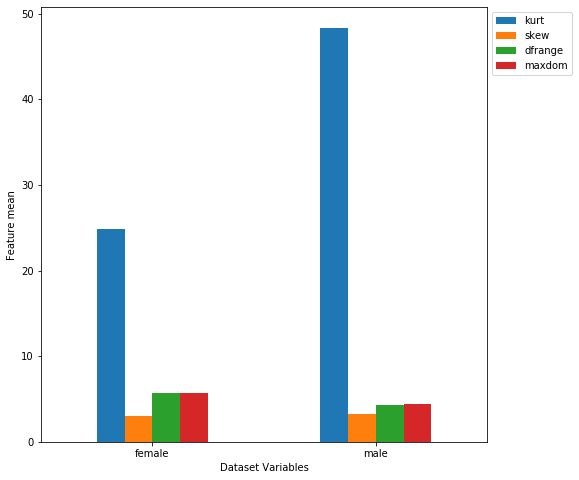

In [21]:
# Plotting the mean of those with more than a unit
datacut2.groupby('label').mean().plot(kind='bar')
plt.ylabel('Feature mean')
plt.xlabel('Dataset Variables')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

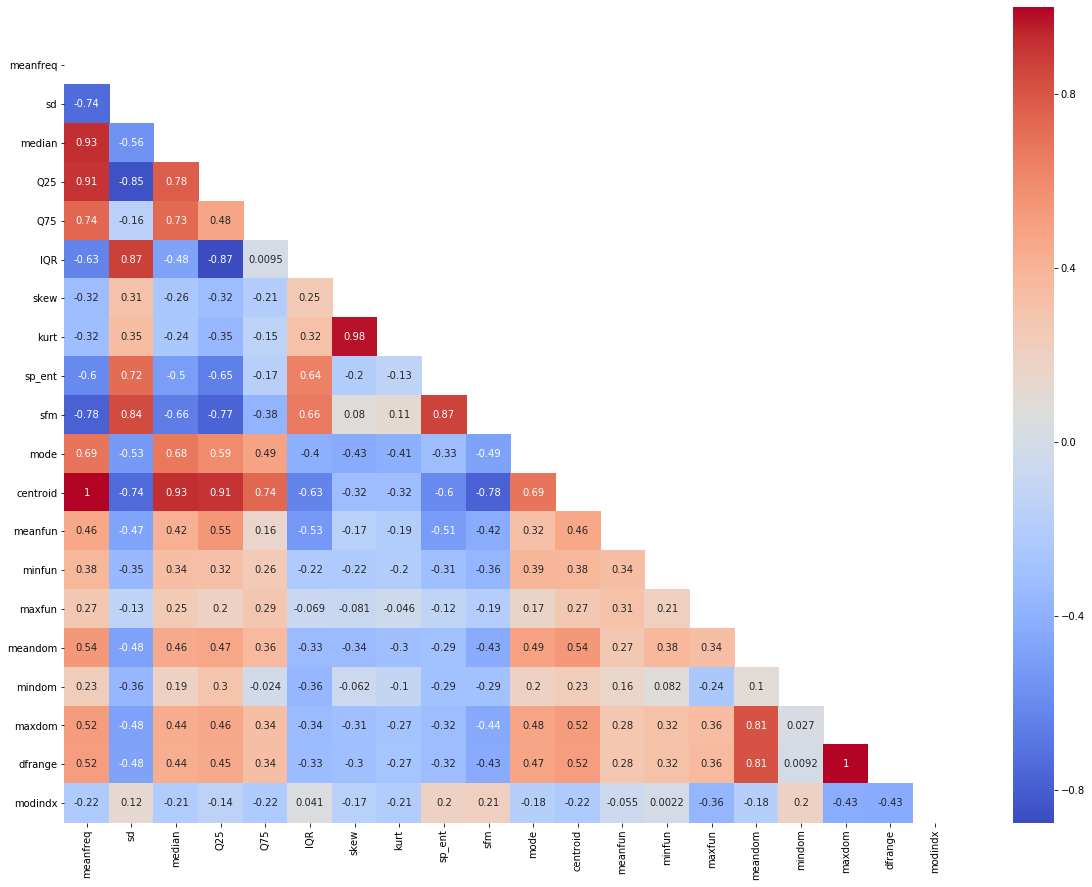

In [22]:
# Correlation Matrix
plt.rcParams['figure.figsize']=(20,15)
correlation_matrix=data.corr()

# Heatmap
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

a=sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=True,
            mask=mask)
a.set_ylim(20,-1)
plt.savefig('correlation.png')
plt.show()


### Observations
The correlation matrix allows us to see that for example centroid and meanfreq have full correlation, that happens as well with dfrange and modindx, we could eliminate 1 and 1 to have less variables, since they behave very similarly. Not doing it now, but it seems reasonable.

In [23]:
# This is just a pairplot of all the variables, it's huge, it takes too long to load, but it looks nice,that's why it's commented
#sns.pairplot(data, hue='label')
#plt.show()

### Creating 2 new dataframes based on the corresponding labels (male/female) for easier data manipulation

In [24]:
maledf=data.loc[data['label']=='male']
maledf=maledf.reset_index()
maledf.head()

,index,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp_ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [25]:
femaledf=data.loc[data['label']=='female']
femaledf=femaledf.reset_index()
femaledf.head()

,index,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp_ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,1584,0.158108,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,...,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,female
1,1585,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,...,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,female
2,1586,0.199807,0.061974,0.211358,0.184422,0.235687,0.051265,2.543841,14.921964,0.904432,...,0.199807,0.156465,0.016194,0.266667,0.250446,0.054688,0.898438,0.843750,0.329521,female
3,1587,0.195280,0.072087,0.204656,0.180611,0.255954,0.075344,2.392326,10.061489,0.907115,...,0.195280,0.182629,0.024922,0.275862,0.269531,0.054688,0.703125,0.648438,0.294717,female
4,1588,0.208504,0.057550,0.220229,0.190343,0.249759,0.059416,1.707786,5.670912,0.879674,...,0.208504,0.162043,0.016807,0.262295,0.260789,0.054688,0.812500,0.757812,0.251546,female


In [26]:
# Getting column names in a list and removing index from it
columna=list(maledf.columns)
columna.remove('index')

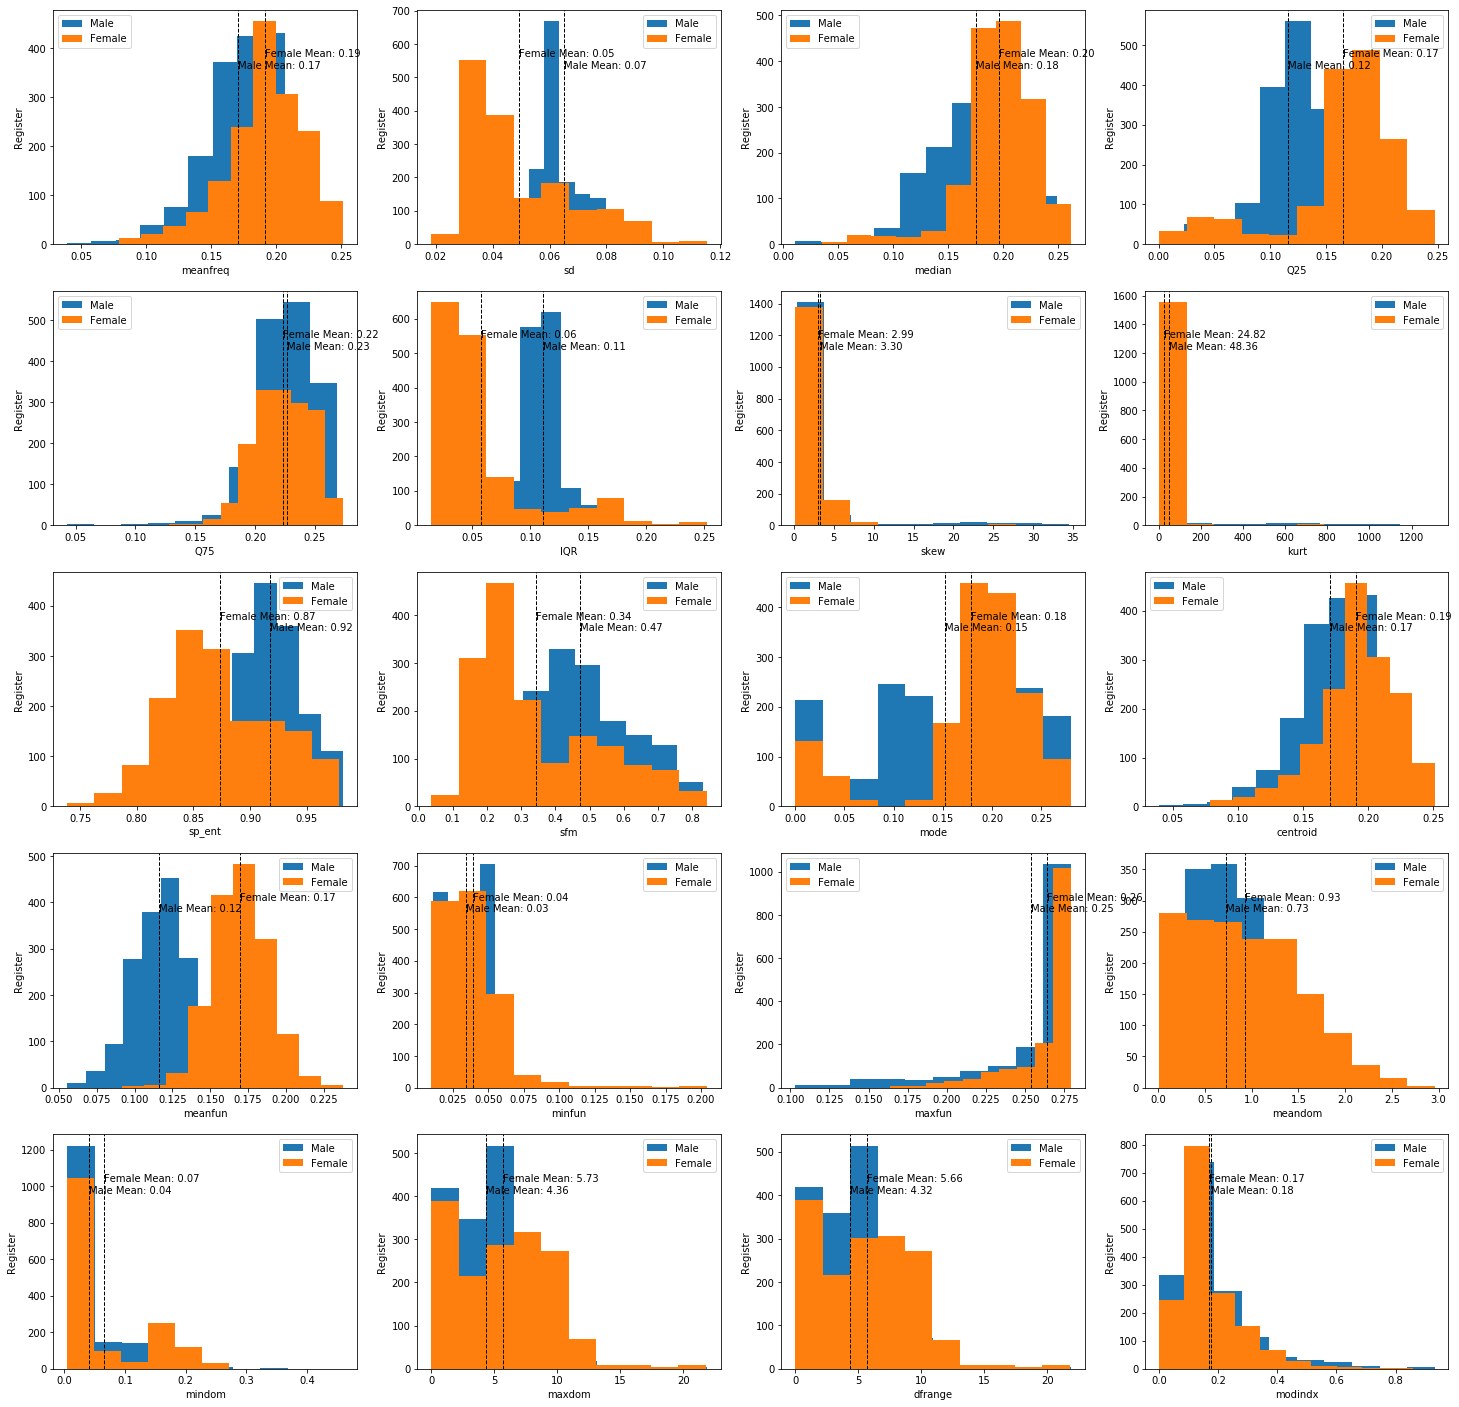

In [27]:
# We'll create subplots for all the variables indicating their mean
plt.rcParams['figure.figsize']=[25,25]
#Setting the number of subplots (5 by 4 grid) and the name we'll assign it (f)
k=0
fig, (f) = plt.subplots(5,4)
#Assigning a subplot to each 
for i in range(5):
    for j in range(4):
        f[i,j].hist(maledf[columna[k]])
        f[i,j].hist(femaledf[columna[k]])
        f[i,j].legend(['Male','Female'])
        f[i,j].set_xlabel(columna[k])
        f[i,j].set_ylabel('Register')
        min_ylim, max_ylim =  f[i,j].get_ylim()
        f[i,j].axvline(femaledf[columna[k]].mean(), color='k',linestyle='dashed', linewidth=1)
        f[i,j].text(femaledf[columna[k]].mean(), max_ylim*0.8, 'Female Mean: {:.2f}'.format(femaledf[columna[k]].mean()))
        f[i,j].axvline(maledf[columna[k]].mean(), color='k', linestyle='dashed', linewidth=1)
        f[i,j].text(maledf[columna[k]].mean(), max_ylim*0.75, 'Male Mean: {:.2f}'.format(maledf[columna[k]].mean()))
        k +=1
plt.savefig('means.png')

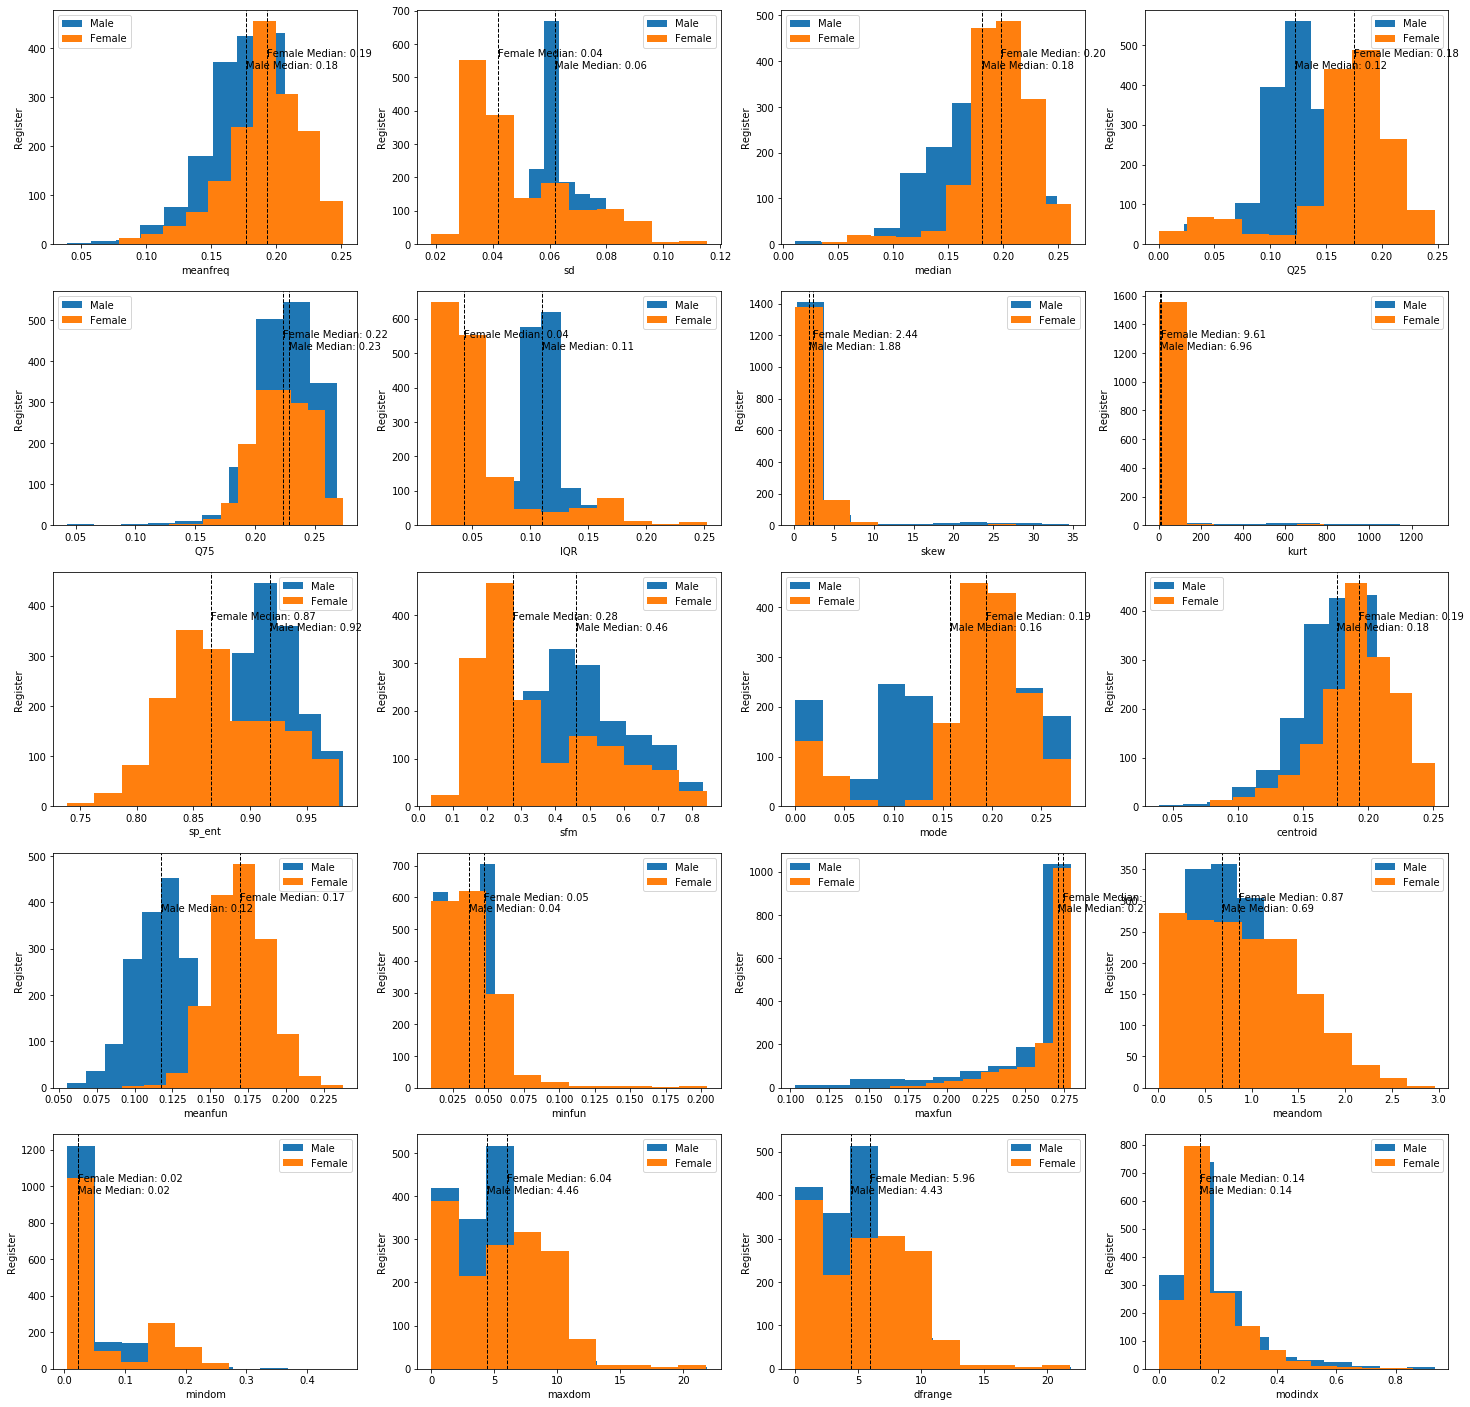

In [28]:
# We'll create subplots for all the variables indicating their median
plt.rcParams['figure.figsize']=[25,25]
#Setting the number of subplots (5 by 4 grid) and the name we'll assign it (f)
k=0
fig, (f) = plt.subplots(5,4)
#Assigning a subplot to each 
for i in range(5):
    for j in range(4):
        f[i,j].hist(maledf[columna[k]])
        f[i,j].hist(femaledf[columna[k]])
        f[i,j].legend(['Male','Female'])
        f[i,j].set_xlabel(columna[k])
        f[i,j].set_ylabel('Register')
        min_ylim, max_ylim =  f[i,j].get_ylim()
        f[i,j].axvline(femaledf[columna[k]].median(), color='k',linestyle='dashed', linewidth=1)
        f[i,j].text(femaledf[columna[k]].median(), max_ylim*0.8, 'Female Median: {:.2f}'.format(femaledf[columna[k]].median()))
        f[i,j].axvline(maledf[columna[k]].median(), color='k', linestyle='dashed', linewidth=1)
        f[i,j].text(maledf[columna[k]].median(), max_ylim*0.75, 'Male Median: {:.2f}'.format(maledf[columna[k]].median()))
        k +=1
plt.savefig('medians.png')

In [ ]:
#Trying mode

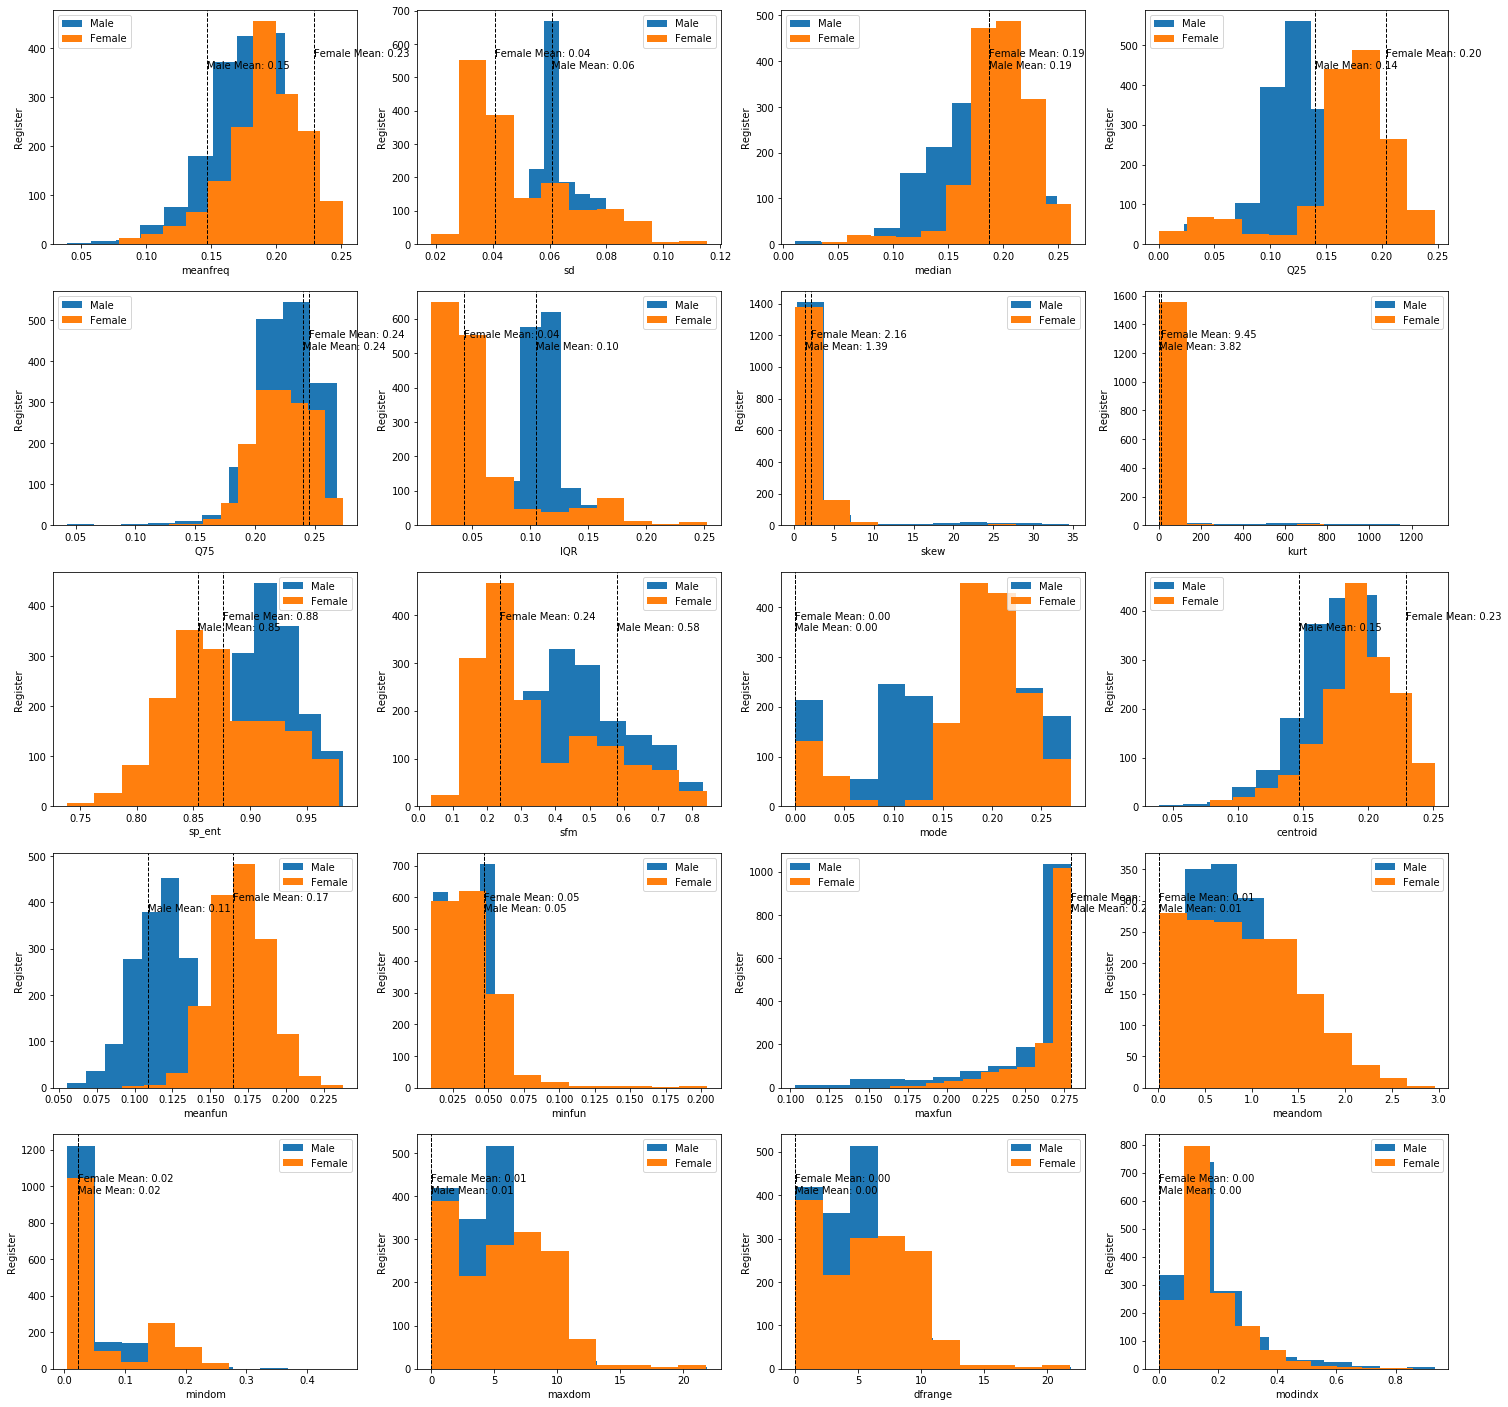

In [59]:
# We'll create subplots for all the variables indicating their mean
plt.rcParams['figure.figsize']=[25,25]
#Setting the number of subplots (5 by 4 grid) and the name we'll assign it (f)
k=0

fig, (f) = plt.subplots(5,4)
#Assigning a subplot to each 
for i in range(5):
    for j in range(4):
        f[i,j].hist(maledf[columna[k]])
        f[i,j].hist(femaledf[columna[k]])
        f[i,j].legend(['Male','Female'])
        f[i,j].set_xlabel(columna[k])
        f[i,j].set_ylabel('Register')
        min_ylim, max_ylim =  f[i,j].get_ylim()
        f[i,j].axvline(femaledf[columna[k]].value_counts().idxmax(), color='k',linestyle='dashed', linewidth=1)
        f[i,j].text(femaledf[columna[k]].value_counts().idxmax(), max_ylim*0.8, 'Female Mean: {:.2f}'.format(femaledf[columna[k]].value_counts().idxmax()))
        f[i,j].axvline(maledf[columna[k]].value_counts().idxmax(), color='k', linestyle='dashed', linewidth=1)
        f[i,j].text(maledf[columna[k]].value_counts().idxmax(), max_ylim*0.75, 'Male Mean: {:.2f}'.format(maledf[columna[k]].value_counts().idxmax()))
        k +=1
plt.savefig('mode.png')

### Notable variables
Now that we have histograms comparing male and female, we can identify which variables we could use to distinguish between male and female

Variables that stand out by being considerably different between labels
 - sd = standard deviation of frequency,
 - Q25 = first quantile (in kHz),
 - IQR = interquantile range (in kHz),
 - sp_ent = spectral entropy,
 - meanfun = average of fundamental frequency measured across acoustic signal

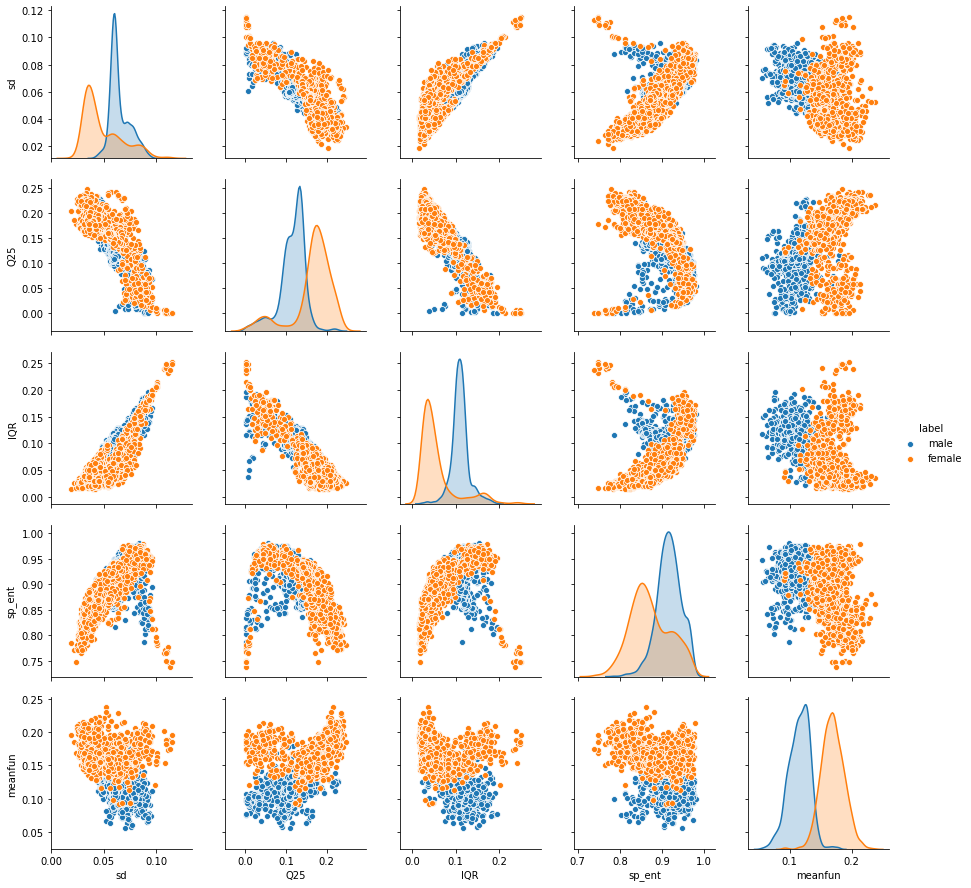

In [33]:
# nice pairplot of the variables we can visually distinguish
datacut3=data[['sd','Q25','IQR','sp_ent','meanfun','label']]
sns.pairplot(datacut3, hue='label')
plt.savefig('pairplot.png')
plt.show()

### Observations
We can tell it'll be harder to distinguish from the plots, since we can't really see the 2 tipping points that we are looking for our variables labels. But the following ones do, so we'll do boxplots and violinplots next to each other to better visualize the differences.

In [34]:
# drawing features against the target variable.
def box_mf(feature):
    sns.catplot(data=data,y=feature,x='label',kind='box')
    fig=plt.gcf()
    fig.set_size_inches(6,4)
    # drawing features against the target variable.
def violin_mf(feature):
    sns.catplot(data=data,y=feature,x='label',kind='violin')
    fig=plt.gcf()
    fig.set_size_inches(6,4)

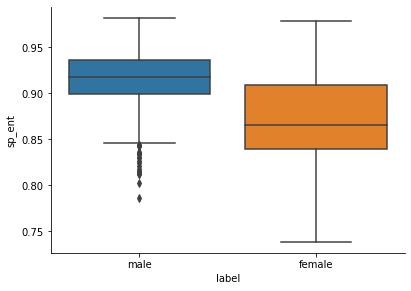

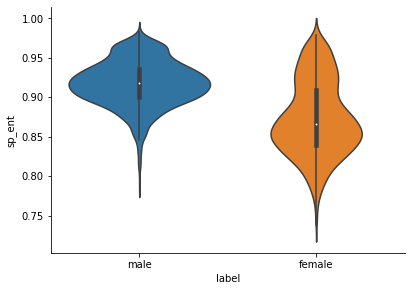

In [36]:
#sp_ent = spectral entropy
box_mf('sp_ent')
violin_mf('sp_ent')

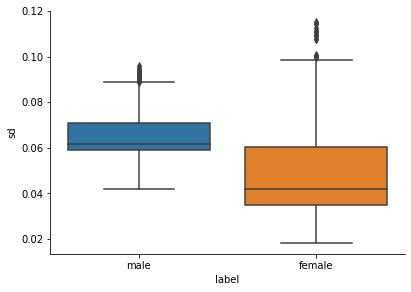

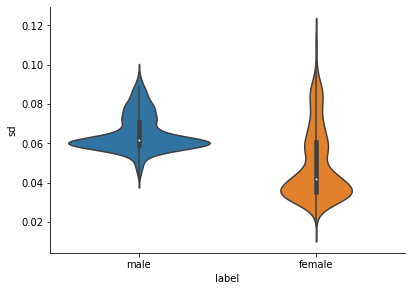

In [37]:
#sd = standard deviation of frequency
box_mf('sd')
violin_mf('sd')

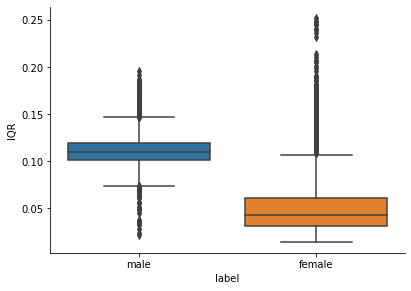

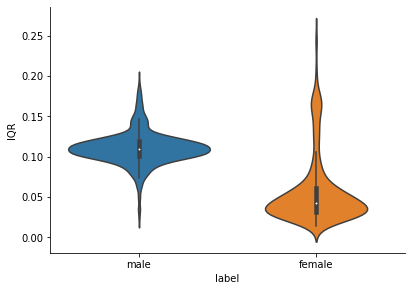

In [38]:
#IQR = interquantile range (in kHz)
box_mf('IQR')
plt.savefig('box.png')
violin_mf('IQR')
plt.savefig('violin.png')

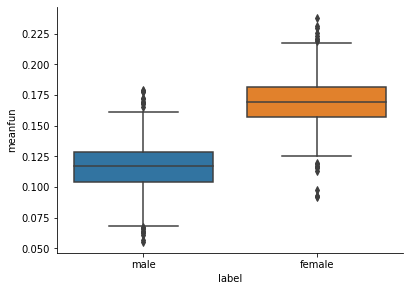

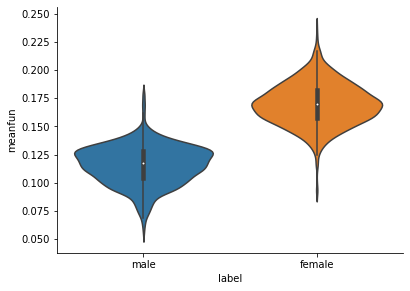

In [39]:
# meanfun = average of fundamental frequency measured across acoustic signal
box_mf('meanfun')
violin_mf('meanfun')

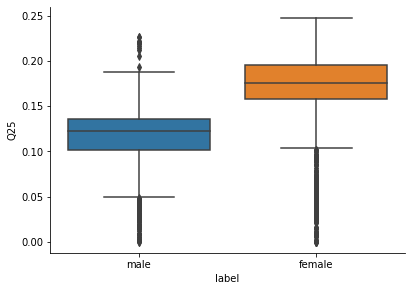

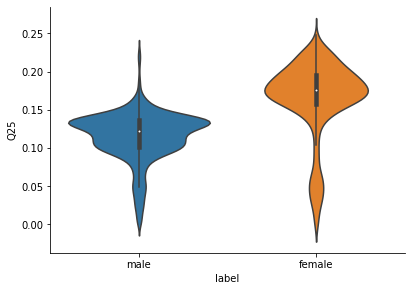

In [35]:
#Q25 = first quantile (in kHz)
box_mf('Q25')
violin_mf('Q25')

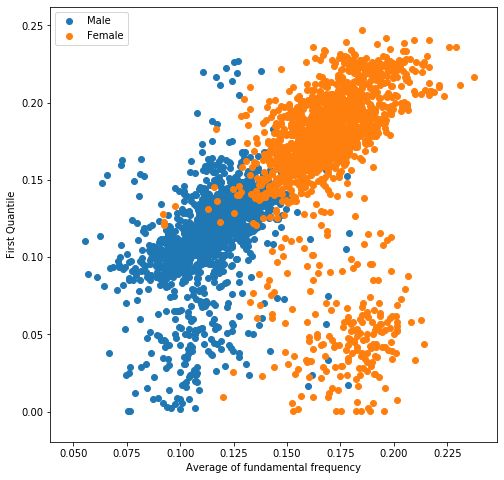

In [47]:
plt.rcParams['figure.figsize']=(8,8)
plt.scatter(maledf.meanfun, maledf.Q25)
plt.scatter(femaledf.meanfun, femaledf.Q25)
plt.legend(['Male','Female'])
plt.xlabel('Average of fundamental frequency')
plt.ylabel('First Quantile')
plt.show()